In [30]:
# 📌 Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [31]:
# Carregar o dataset com Features Selecionadas
file_path = "../dataset/results/ObesityDataSet_selected.csv"
df = pd.read_csv(file_path)

print("\n✅ Dataset carregado com sucesso!")
print(df.head())




✅ Dataset carregado com sucesso!
        Age    Height    Weight  FCVC  CH2O  TUE  Gender_Male  \
0  0.333804  0.270559  0.198323   0.5   0.5  0.5        False   
1  0.333804  0.047765  0.134859   1.0   1.0  0.0        False   
2  0.429177  0.671588  0.301450   0.5   0.5  0.5         True   
3  0.619922  0.671588  0.380779   1.0   0.5  0.0         True   
4  0.715295  0.270559  0.111061   0.5   0.5  0.0         True   

                    Target_Class  
0       NObeyesdad_Normal_Weight  
1       NObeyesdad_Normal_Weight  
2       NObeyesdad_Normal_Weight  
3  NObeyesdad_Overweight_Level_I  
4       NObeyesdad_Normal_Weight  


In [22]:
# 📌 Identificar a variável alvo corretamente
target_col = "Target_Class"  # Nome correto da variável alvo
X = df.drop(columns=[target_col])  # Mantém apenas as features
y = df[target_col]  # Mantém apenas a variável alvo

In [6]:
# 📌 Aplicar Label Encoding na variável alvo (caso ainda esteja em texto)
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
# 📌 Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [8]:
# 📌 Normalizar os dados para redes neurais
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# 📌 Função para treinar e avaliar modelos clássicos
def train_evaluate_model(model, X_train, y_train, X_test, y_test, name):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_acc = scores.mean()
    std_acc = scores.std()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    print(f"\n🔍 Modelo: {name}")
    print(f"📊 Acurácia (Cross-Validation): {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"📊 Acurácia (Teste Final): {test_acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    return test_acc  # Retorna a acurácia final para comparação

In [ ]:
# 📌 Treinar modelos clássicos
models = {
    "Regressão Logística": LogisticRegression(max_iter=2000),
    "Árvore de Decisão": DecisionTreeClassifier(),
   "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    results[name] = train_evaluate_model(model, X_train, y_train, X_test, y_test, name)



🔍 Modelo: Regressão Logística
📊 Acurácia (Cross-Validation): 0.7542 ± 0.0103
📊 Acurácia (Teste Final): 0.7732
                                precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.79      0.89      0.84        64
     NObeyesdad_Obesity_Type_I       0.69      0.66      0.67        64
    NObeyesdad_Obesity_Type_II       0.85      0.95      0.90        65
   NObeyesdad_Obesity_Type_III       0.93      1.00      0.96        65
 NObeyesdad_Overweight_Level_I       0.75      0.58      0.66        65
NObeyesdad_Overweight_Level_II       0.59      0.55      0.57        65

                      accuracy                           0.77       388
                     macro avg       0.77      0.77      0.77       388
                  weighted avg       0.77      0.77      0.77       388


🔍 Modelo: Árvore de Decisão
📊 Acurácia (Cross-Validation): 0.9690 ± 0.0063
📊 Acurácia (Teste Final): 0.9562
                                precision    recall  f1-s

In [28]:

# 📌 Criar e treinar uma Rede Neural com saída multiclasses
def build_nn(input_dim, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')  # 🔄 Saída softmax para múltiplas classes
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model  

In [29]:
# 📌 Treinar a rede neural
nn_model = build_nn(X_train_scaled.shape[1], len(np.unique(y)))

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100, batch_size=32, verbose=1
)

ValueError: Invalid dtype: object

In [26]:
# Fazer previsão na rede neural
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_nn, axis=1)  # Converter para rótulos de classe

# Exibir relatório de classificação
print("\n🔍 Relatório de Classificação da Rede Neural:")
print(classification_report(y_test, y_pred_nn))

# Atualizar os resultados no dicionário para exibir no gráfico
results["Rede Neural"] = nn_acc

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

🔍 Relatório de Classificação da Rede Neural:


ValueError: Mix of label input types (string and number)

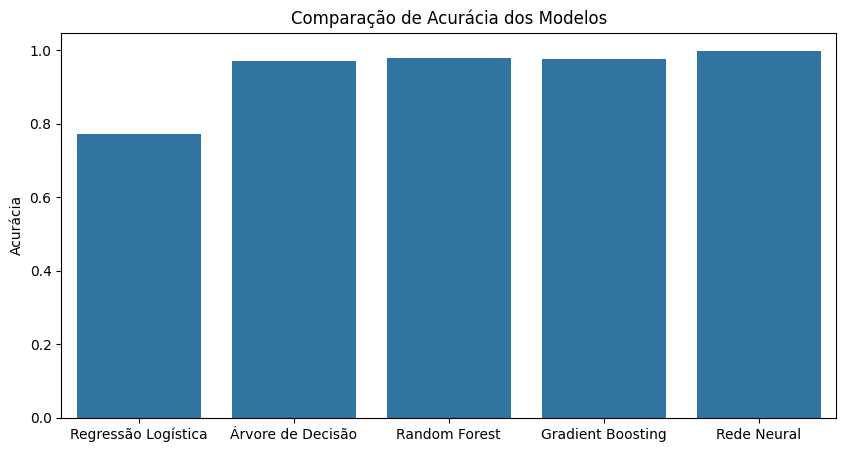

In [19]:
# 📌 Exibir os resultados comparativos
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Comparação de Acurácia dos Modelos")
plt.ylabel("Acurácia")
plt.show()

In [20]:
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20, batch_size=32, verbose=1  # 🔴 Reduzindo épocas para evitar overfitting
)

print("\n📌 Comparando amostras de treino e teste para garantir que são diferentes:")
print(pd.Series(y_train).value_counts(), "\nTreino")
print(pd.Series(y_test).value_counts(), "\nTeste")



Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0185 - val_accuracy: 0.9948 - val_loss: 0.0168
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9948 - val_loss: 0.0164
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0208 - val_accuracy: 0.9948 - val_loss: 0.0157
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0130 - val_accuracy: 0.9948 - val_loss: 0.0136
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0230 - val_accuracy: 0.9923 - val_loss: 0.0263
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0292 - val_accuracy: 0.9974 - val_loss: 0.0141
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0260 - val_accuracy: 0.9974 - val_loss: 0.0108
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0163 - val_accuracy: 0.9923 - val_loss:

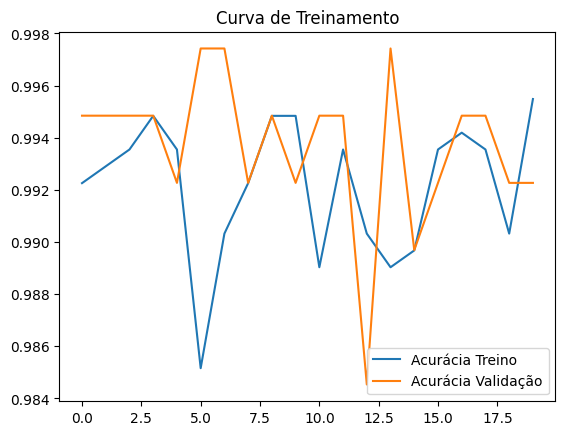

In [21]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title("Curva de Treinamento")
plt.legend()
plt.show()
